# Colombian Coffee Production Prediction

## Other Country Analysis

This sript will retrieve information from **both** the .csv files saved on step 0 ([Loading Data](00_LoadingData.ipynb)), monthly and yearly, and perform a partial analysis using only variables related to economy and other country information.

If step 0 ([Loading Data](00_LoadingData.ipynb)) has already been executed **once** it will not be necessary to execute it again.  For analysis purposes, it's also assumed tht step 1 ([EDA](01_EDA.ipynb)) has also been executed for a better understanding

In [25]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import model_selection

**Load Clean Monthly Data**

In [3]:
pd.set_option('display.max_rows',50)
coffee_df=pd.read_csv('../csv/FINAL_coffee_mth.csv', index_col=0)
len(coffee_df)

98

**Load Clean Yearly Data**

In [7]:
# Load Yearly data
countries_df=pd.read_csv('../csv/FINAL_coffee_yr.csv')
len(countries_df)

28

In [8]:
countries_df.tail()

,Unnamed: 0,Brazil,Vietnam,Colombia,Indonesia,Honduras,Ethiopia,India,Uganda,Peru,Mexico,total
23,2013,54698.0833,27609.7814,12163.1252,11265.1941,4583.0246,6427.4439,5075.3312,3632.867,4338.0893,3916.4766,133709.4166
24,2014,52298.9787,26499.8404,13339.4695,11418.2773,5268.2161,6575.2618,5449.8670,3744.477,2883.2290,3591.2000,131068.8168
25,2015,50387.6396,28736.5941,14009.1524,12317.4751,5785.7760,6713.9754,5800.3381,3649.567,3303.5542,2903.3950,133607.4669
26,2016,54999.7634,25540.2932,14634.0003,11491.0266,7456.8976,7296.9796,5199.9436,4962.158,4222.8784,3780.5150,139584.4557
27,2017,51000.0000,29500.0000,14000.0000,12000.0000,8349.0000,7650.0000,5840.0000,5100.000,4300.0000,4000.0000,141739.0000


### EDA on Yearly Data

**Plot general Production of top 10 coutries by month**

Populating the interactive namespace from numpy and matplotlib


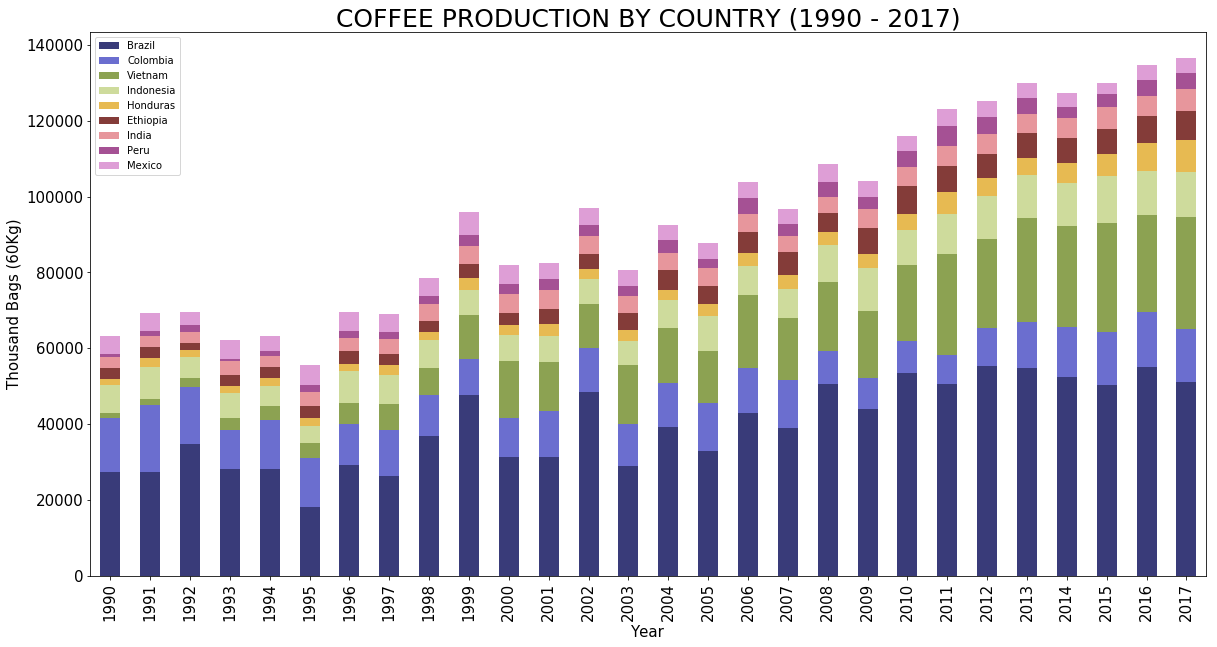

In [51]:
%pylab inline

bars=countries_df[['Brazil', 'Colombia', 'Vietnam', 'Indonesia', 'Honduras', 'Ethiopia', 'India', 'Peru', 'Mexico']]

labels = range(1990,2018)
bars.plot(kind="bar", stacked=True, colormap='tab20b', xticks=labels, figsize=(20, 10))
plt.title('COFFEE PRODUCTION BY COUNTRY (1990 - 2017)', fontsize=25)
plt.ylabel('Thousand Bags (60Kg)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(np.arange(0,28),labels, fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('../graphs/Top10Countries_Bar.png')

**Correlation Heatmap between all countries**

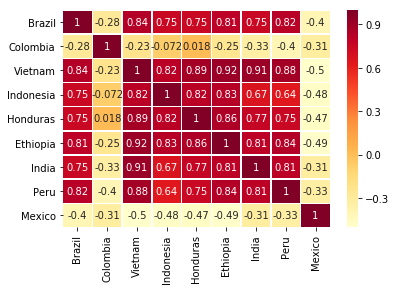

In [52]:
sns.heatmap(bars.corr(), annot=True, linewidths=.5, cmap='YlOrRd')
plt.savefig('../graphs/Top10Countries_CorrHeatmap.png')

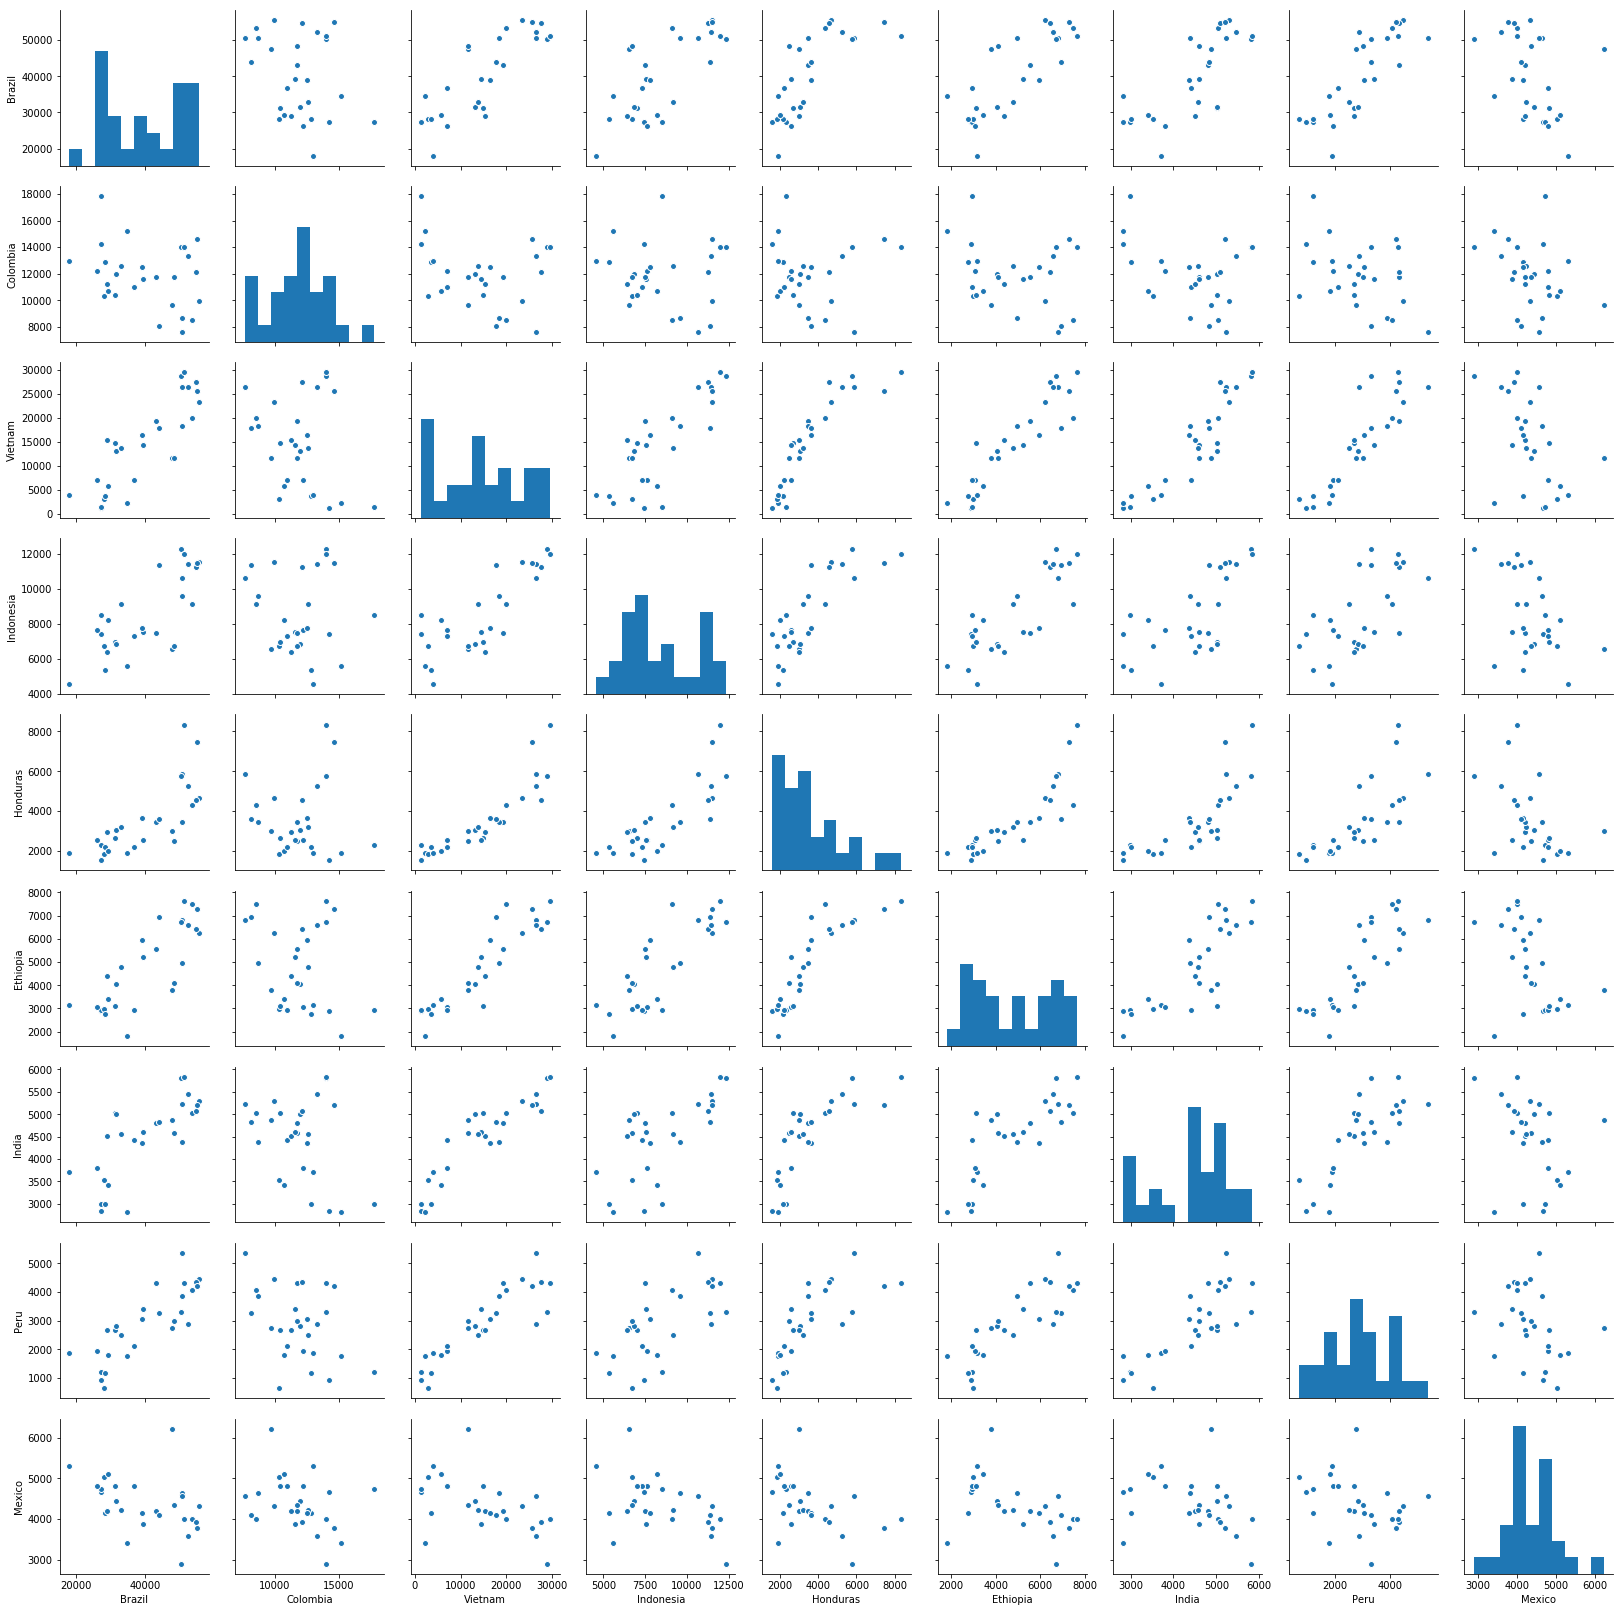

In [53]:
sns.pairplot(bars)
plt.savefig('../graphs/Top10Countries_pairplot.png')

### Yearly Analysis using all Countries

In [29]:
y = countries_df['Colombia']
x = countries_df[['Brazil', 'Vietnam', 'Indonesia', 'Honduras',
       'Ethiopia', 'India', 'Uganda', 'Peru', 'Mexico']]

**Split data into train (70%) and test (30%) sets, generate a first model**

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

/Users/monita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Colombia   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     38.35
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           1.39e-06
Time:                        13:51:58   Log-Likelihood:                -171.59
No. Observations:                  19   AIC:                             361.2
Df Residuals:                      10   BIC:                             369.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Brazil         0.0740      0.112      0.659      0.525      -0.176       0.324
Vietnam       -0.5697      0.316     -1.803      0.102      -1.274       0.134
Indonesia      0.1330      0.657      0.202      0.844      -1.331       1.597
Honduras       0.9277      1.162      0.798      0.443      -1.662       3.517
Ethiopia       0.1596      1.155      0.138      0.893      -2.414       2.733
India          2.3515      1.750      1.344      0.209      -1.548       6.251
Uganda         1.1183      1.754      0.638      0.538      -2.789       5.026
Peru           0.2304      1.726      0.134      0.896      -3.614       4.075
Mexico        -0.6522      1.436     -0.454      0.659      -3.851       2.547
==============================================================================
Omnibus:                        0.932   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.732
Skew:                          -0.070   Prob(JB):                        0.693
Kurtosis:                       2.049   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:**
* R2 has improved a lot! (0.972), as well as Adj-R2 (0.946)
* Although P Values don't look very good: [0.102, 0,896]
* None coutry seems significant (See also correlation heatmap)
* Skew is close to 0 (0.07)
* Kurtosis is low as well (2.049 < 7)

**Residual Plot**

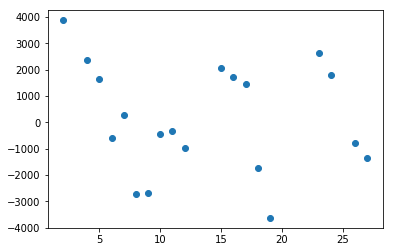

In [32]:
fit.resid.plot(style='o', figsize=(6,4))

In [33]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8003295440439975

R2 value has changed, model doesn't seem accurate.

**Test Score**

In [35]:
lr.score(X_test, y_test)

0.08870028587614287

**Conclusion**

Model doesn't come out very accurate, none of the country data seems to impact data in Colombia.  Analysis will now be made only on a few countries: **Brazil** (Biggest Competitor), **Vietnam** (Close competitor in Production size, lowest P-value), **Mexico and Peru** (Similar economical and political conditions)

### Yearly Analysis for Relevant Countries

In [37]:
y = countries_df['Colombia']
x = countries_df[['Brazil', 'Vietnam', 'Peru', 'Mexico']]

**Split data into train (70%) and test (30%) sets, generate a model**

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

/Users/monita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Colombia   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     78.17
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           7.35e-10
Time:                        14:00:37   Log-Likelihood:                -176.66
No. Observations:                  19   AIC:                             361.3
Df Residuals:                      15   BIC:                             365.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Brazil         0.1954      0.111      1.756      0.100      -0.042       0.433
Vietnam       -0.0151      0.200     -0.075      0.941      -0.442       0.411
Peru          -1.4160      1.481     -0.956      0.354      -4.574       1.742
Mexico         2.0311      0.558      3.641      0.002       0.842       3.220
==============================================================================
Omnibus:                        0.965   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.826
Skew:                          -0.248   Prob(JB):                        0.662
Kurtosis:                       2.108   Cond. No.                         92.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysis:**
* R2 is still **suspitiously high** (0.954), as well as Adj-R2 (0.942)
* P Values are still high, expect for Mexico [0.002, 0,941]
* Skew is now negative, and a little higher (-0.248)
* Kurtosis is low as well (2.108 < 7)

**Residual Plot**

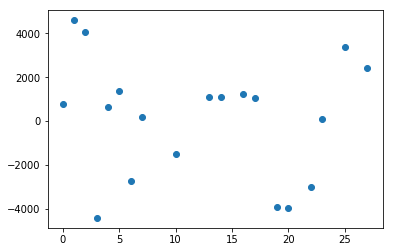

In [41]:
fit.resid.plot(style='o', figsize=(6,4))

In [42]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.28709006525789604

R2 value has changed, model doesn't seem accurate.

In [43]:
lr.score(X_test, y_test)

0.42896046908185476

**Conclusion**

Model is still not accurate and doesn't predict well.  There seems to be some kind of dependency between the countries between each other (See correlation heatmap)

### Economical Coutry Analysis (Monthly)

**Separate Independent Variables (Price by Country, Exportation Volumnes and Trm - Dollar Rate)**

In [44]:
y = coffee_df['Produccion']
x = coffee_df[['colombia_price', 'brasil_price',
       'others_price', 'vol_export', 'trm', 'Intercept']]
x.head()

,colombia_price,brasil_price,others_price,vol_export,trm,Intercept
0,207.51,131.67,158.90,541.2,1983.426770,1.0
1,204.71,124.57,157.86,590.0,1951.723934,1.0
2,205.71,126.21,164.50,576.0,1908.991973,1.0
3,199.50,125.71,169.24,588.0,1937.448991,1.0
4,200.33,127.32,173.28,576.0,1983.593230,1.0


**Split data into train (70%) and test (30%) sets, generate a model**

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Produccion   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     63.35
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           4.58e-23
Time:                        14:08:26   Log-Likelihood:                -419.80
No. Observations:                  68   AIC:                             851.6
Df Residuals:                      62   BIC:                             864.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
colombia_price    -1.0841      1.709     -0.635      0.528      -4.499       2.331
brasil_price      -1.7414      1.872     -0.930      0.356      -5.483       2.000
others_price       2.0559      2.611      0.787      0.434      -3.163       7.275
vol_export         0.9309      0.116      8.039      0.000       0.699       1.162
trm                0.0252      0.047      0.532      0.596      -0.070       0.120
Intercept        184.0035    147.957      1.244      0.218    -111.759     479.766
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.030
Skew:                           0.049   Prob(JB):                        0.985
Kurtosis:                       2.969   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis:**
* R2 is a good value! (0.836), as well as Adj-R2 (0.823)
* However, P Values are high, they don't seem to predict very well, except for vol_export: [0.218, 0,596]
* Only significant **economical variable** seems to be **vol_export** with a P-value of 0!
* Skew is very close to 0 (0.049)
* Kurtosis is low as well (2.97 < 7)

**Residual Plot**

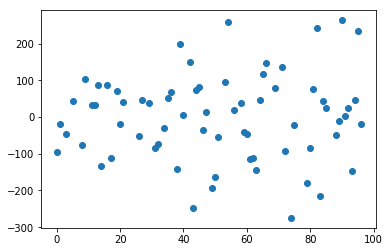

In [47]:
fit.resid.plot(style='o', figsize=(6,4))

In [48]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.836311177798243

R2 value has changed, model **still** doesn't seem accurate.

In [49]:
lr.score(X_test, y_test)

0.6709116026921654

**Inverse relation of Price and Production**

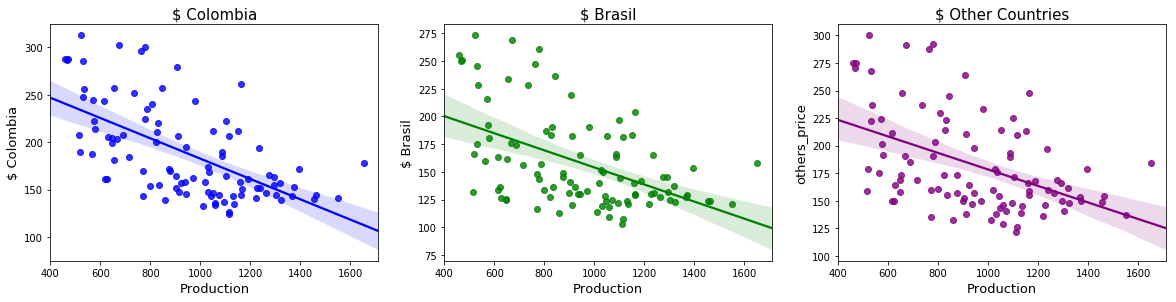

In [54]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 3, 1)
sns.regplot(x='Produccion', y='colombia_price', data=coffee_df, color='blue', marker='o')
plt.title('$ Colombia', fontsize=15)
plt.ylabel('$ Colombia', fontsize=13)
plt.xlabel('Production', fontsize=13)

plt.subplot(4, 3, 2)
sns.regplot(x='Produccion', y='brasil_price', data=coffee_df, color='green', marker='o')
plt.title('$ Brasil', fontsize=15)
plt.ylabel('$ Brasil', fontsize=13)
plt.xlabel('Production', fontsize=13)

plt.subplot(4, 3, 3)
sns.regplot(x='Produccion', y='others_price', data=coffee_df, color='purple', marker='o')
plt.title('$ Other Countries', fontsize=15)
plt.ylabel('$ Other Countries', fontsize=13)
plt.ylabel('others_price')
plt.xlabel('Production', fontsize=13)

plt.savefig('../graphs/Top10Countries_InverseCost.png')

**Conclusion**

Prices and Production in other countries don't seem to have an impact on Coffee Production in Colombia.  On the contrary, Price and Production are related to **each other**, but an inverse relation: Price depends on Production, and not the other way around, like it was asssumed for this analysis.

The only economical variable that seems to influence in the model is the Exportation Volumnes by month, although not very significantly.  Further Analysis still needs to be done.